# *Analysis 2: Games*
Let's proceed with the second table: **Games**
This table represents the details of various soccer matches in national championships. Each row corresponds to a **specific match**, with detailed information about the event. **Displayed** the first rows of the table to get an idea of the data present.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '../')

In [2]:
df= pd.read_csv('../Datasets/games.csv')

df.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,NaN,NaN,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,...,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,NaN,NaN,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,...,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league


Here is the column analysis:
- **Identifiers:**
  - **game_id:** Unique identifier of the match.
  - **competition_id:** Identifier of the championship or competition.
  - **home_club_id:** Identifier of the home club.
  - **away_club_id:** Identifier of the away club.

- **Match Information:**
  - **season:** Season in which the match took place.
  - **round:** Round or matchday of the championship.
  - **date:** Date of the match.
  - **stadium:** Stadium where the match was played.
  - **attendance:** Number of spectators present.
  - **referee:** Name of the referee.
  - **url:** URL of the page with match details on Transfermarkt.

- **Team Details:**
  - **home_club_goals:** Number of goals scored by the home club.
  - **away_club_goals:** Number of goals scored by the away club.
  - **home_club_position:** League position of the home club before the match.
  - **away_club_position:** League position of the away club before the match.
  - **home_club_manager_name:** Name of the home club's manager.
  - **away_club_manager_name:** Name of the away club's manager.
  - **home_club_formation:** Formation of the home club.
  - **away_club_formation:** Formation of the away club.
  - **home_club_name:** Name of the home club.
  - **away_club_name:** Name of the away club.
  - **aggregate:** Aggregate result of the match.

- **Type of Competition:**
  - **competition_type:** Type of competition (e.g., national championship).


In [3]:
print('Numero di righe e colonne:', df.shape)

Numero di righe e colonne: (65216, 23)


Compared to the previously analyzed Competitions table, the Games table **contains many more records**, 
which confirms that it is a table used to **store dynamic data**.

In [4]:
df.dtypes

game_id                     int64
competition_id             object
season                      int64
round                      object
date                       object
home_club_id                int64
away_club_id                int64
home_club_goals             int64
away_club_goals             int64
home_club_position        float64
away_club_position        float64
home_club_manager_name     object
away_club_manager_name     object
stadium                    object
attendance                float64
referee                    object
url                        object
home_club_formation        object
away_club_formation        object
home_club_name             object
away_club_name             object
aggregate                  object
competition_type           object
dtype: object

Let's proceed with checking for the presence of null values.

In [5]:
df.isnull().sum()

game_id                       0
competition_id                0
season                        0
round                         0
date                          0
home_club_id                  0
away_club_id                  0
home_club_goals               0
away_club_goals               0
home_club_position        19454
away_club_position        19454
home_club_manager_name      742
away_club_manager_name      742
stadium                     211
attendance                 9512
referee                     594
url                           0
home_club_formation       62347
away_club_formation       62328
home_club_name            11252
away_club_name            10049
aggregate                     0
competition_type              0
dtype: int64

Among the matches stored in the dataset, many have **formations** that are **null**. Specifically, the following fields are null:
- home_club_position
- away_club_position
- home_club_manager_name
- away_club_manager_name
- stadium
- attendance
- referee
- home_club_formation
- away_club_formation
- home_club_name
- away_club_name

We will handle the data as follows: instead of removing rows with null values, we will replace the **missing** values with **Unknown** strings or negative numbers **(-1)**. Removing entire rows might lead to the loss of important information.


Let's proceed with replacing the null values while preserving the original data types (float or string).


In [6]:
colonne_unknown = ['home_club_manager_name', 'away_club_manager_name', 'stadium', 'referee', 'home_club_formation', 'away_club_formation', 'home_club_name', 'away_club_name']
colonne_meno_uno = ['home_club_position', 'away_club_position', 'attendance']

for colonna in colonne_unknown:
    df[colonna] = df[colonna].fillna('Unknown')

for colonna in colonne_meno_uno:
    df[colonna] = df[colonna].fillna(-1)


Given the presence of several numerical fields, the **describe** statement is useful as it may provide **valuable insights**.
We will exclude the null values previously replaced with **-1**.


In [7]:
df[df.select_dtypes(include=['float64', 'int64']).ne(-1)].describe()

,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance
count,6.521600e+04,65216.000000,65216.000000,65216.000000,65216.000000,65216.000000,45762.000000,45762.000000,55704.000000
mean,3.018125e+06,2017.252990,4921.579597,4441.948862,1.593290,1.321440,9.273043,9.456776,18060.337337
std,5.605215e+05,3.348529,11440.848691,10262.628710,1.427243,1.363181,5.299837,5.321858,17764.667425
min,2.211607e+06,2012.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.518596e+06,2014.000000,354.000000,347.000000,1.000000,0.000000,5.000000,5.000000,4300.000000
50%,2.919854e+06,2017.000000,995.000000,989.000000,1.000000,1.000000,9.000000,9.000000,12140.000000
75%,3.450800e+06,2020.000000,3205.000000,3028.000000,2.000000,2.000000,14.000000,14.000000,26184.000000
max,4.228114e+06,2023.000000,112753.000000,112755.000000,15.000000,19.000000,21.000000,21.000000,99354.000000


As noted in the display of the first 5 rows of the DataFrame, the **'url'** column contains hyperlinks. 
This column is **not relevant** for data analysis and can be removed.


In [8]:
df = df.drop(columns=['url'])

print('Numero di righe e colonne dopo la rimozione della colonna url:', df.shape)

if 'url' in df.columns:
    print("La colonna 'url' è ancora presente.")
else:
    print("La colonna 'url' è stata rimossa.")


Numero di righe e colonne dopo la rimozione della colonna url: (65216, 22)
La colonna 'url' è stata rimossa.


The **removal** of the **'url'** column has been **successful**.


Let's proceed with constructing the first chart.
This represents the **number of matches** played in each **season**. 
The chart used is a **line chart**.


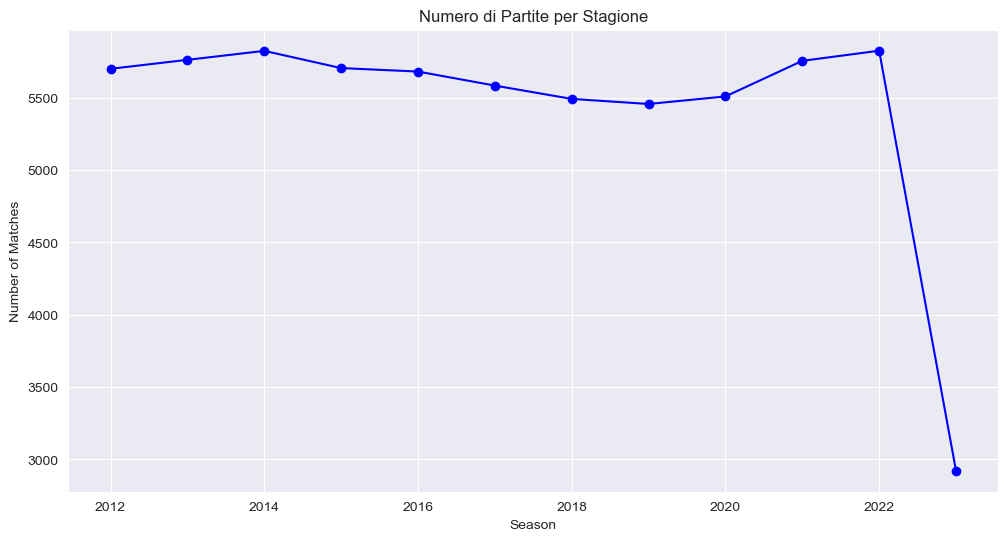

In [9]:
partite_per_stagione = df.groupby('season')['game_id'].count()

plt.figure(figsize=(12, 6))
plt.plot(partite_per_stagione.index, partite_per_stagione.values, marker='o', linestyle='-', color='b')
plt.title('Numero di Partite per Stagione')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

The database contains data on goals scored by home and away teams.
Teams are ranked based on the **average** number of goals scored at home and away. 
Teams with the highest average goals scored at home and away are selected and displayed in two scatter plots. 
The first plot shows the **top 20 teams** with the highest average goals scored at home, while the second plot shows the **top 20 teams** with the highest average goals scored away.

Values that were previously replaced with **-1** are excluded from the analysis.


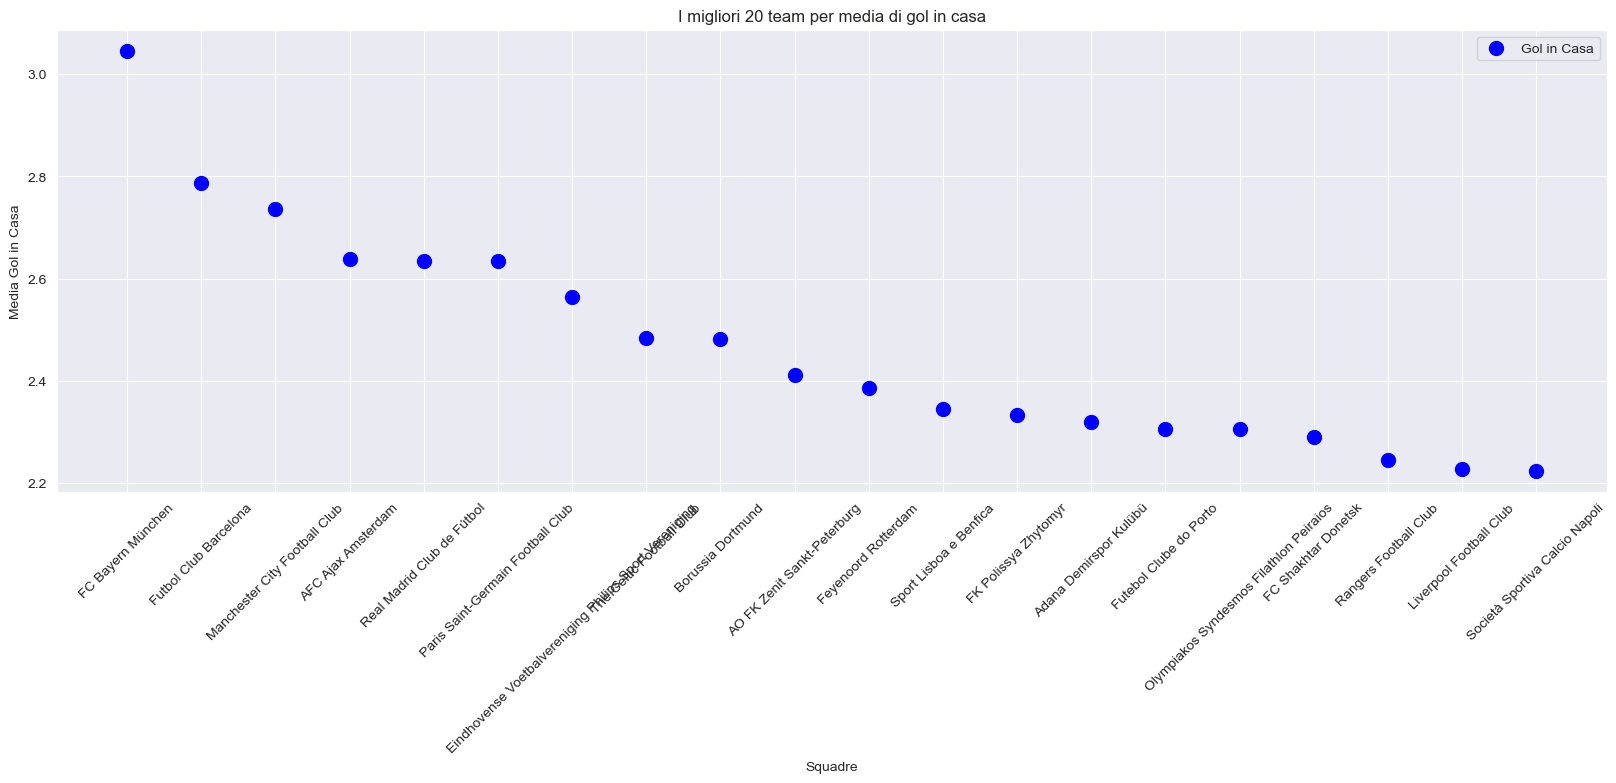

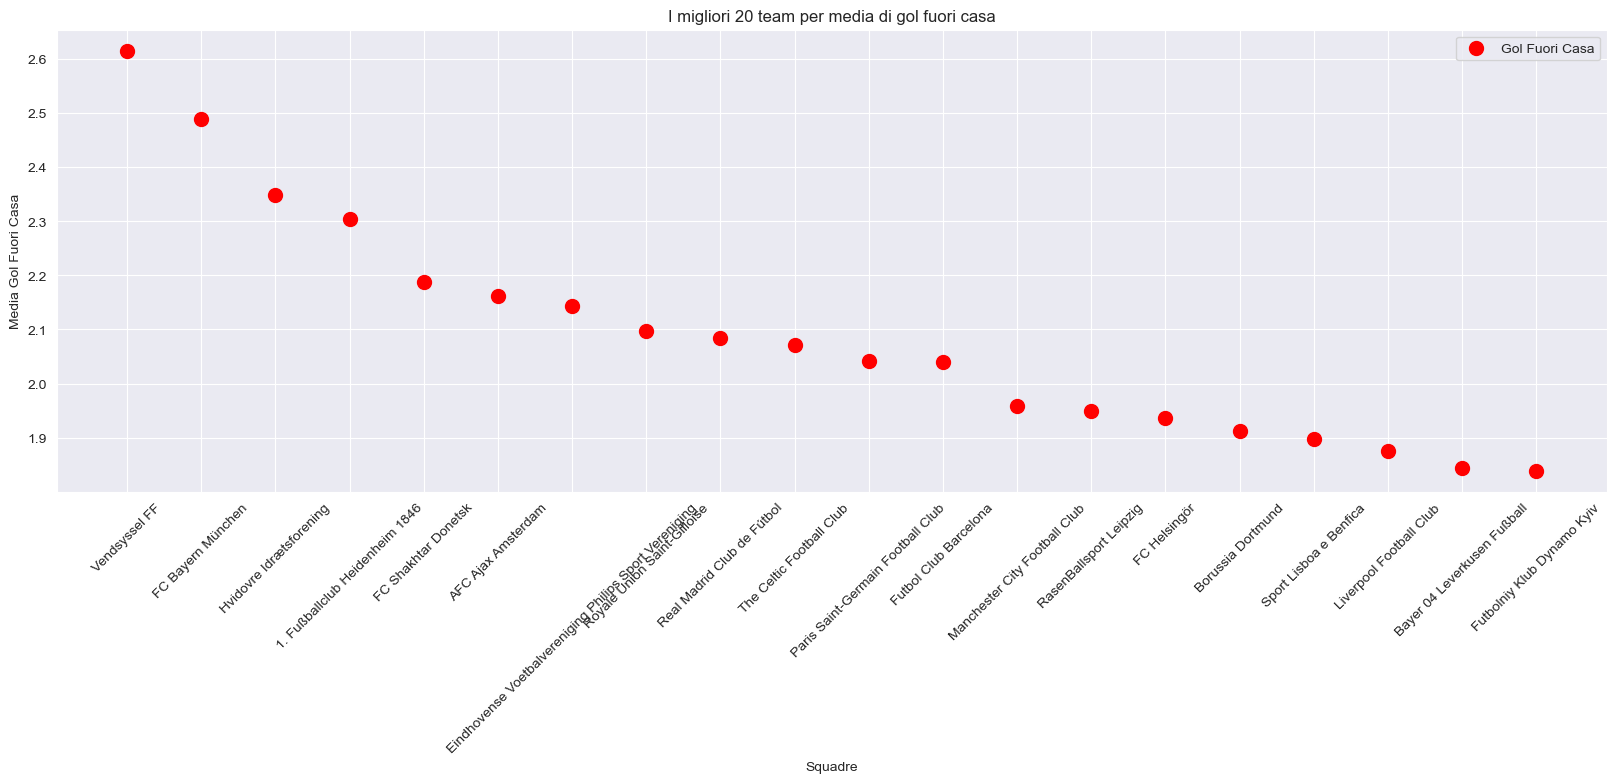

In [10]:
from Utils.GamesUtils import plot_top_teams_scatter

df_filtered = df[df['home_club_goals'].ne(-1) & df['away_club_goals'].ne(-1)]

media_gol_casa = df_filtered.groupby('home_club_name')['home_club_goals'].mean()
media_gol_fuori = df_filtered.groupby('away_club_name')['away_club_goals'].mean()

top_10_home = media_gol_casa.sort_values(ascending=False).head(20)

top_10_away = media_gol_fuori.sort_values(ascending=False).head(20)

plot_top_teams_scatter(data=top_10_home, title='I migliori 20 team per media di gol in casa', xlabel='Squadre', ylabel='Media Gol in Casa', color='blue', label='Gol in Casa')

plot_top_teams_scatter(data=top_10_away, title='I migliori 20 team per media di gol fuori casa', xlabel='Squadre', ylabel='Media Gol Fuori Casa', color='red', label='Gol Fuori Casa')

Given the presence of the **Stadium** and **Attendance** columns in the DataFrame, we can analyze the average number of spectators per stadium.
The **top 20 stadiums** with the highest average number of spectators are selected and displayed in a bar chart.
It is concluded that the **Millennium Stadium** has the highest average number of spectators.


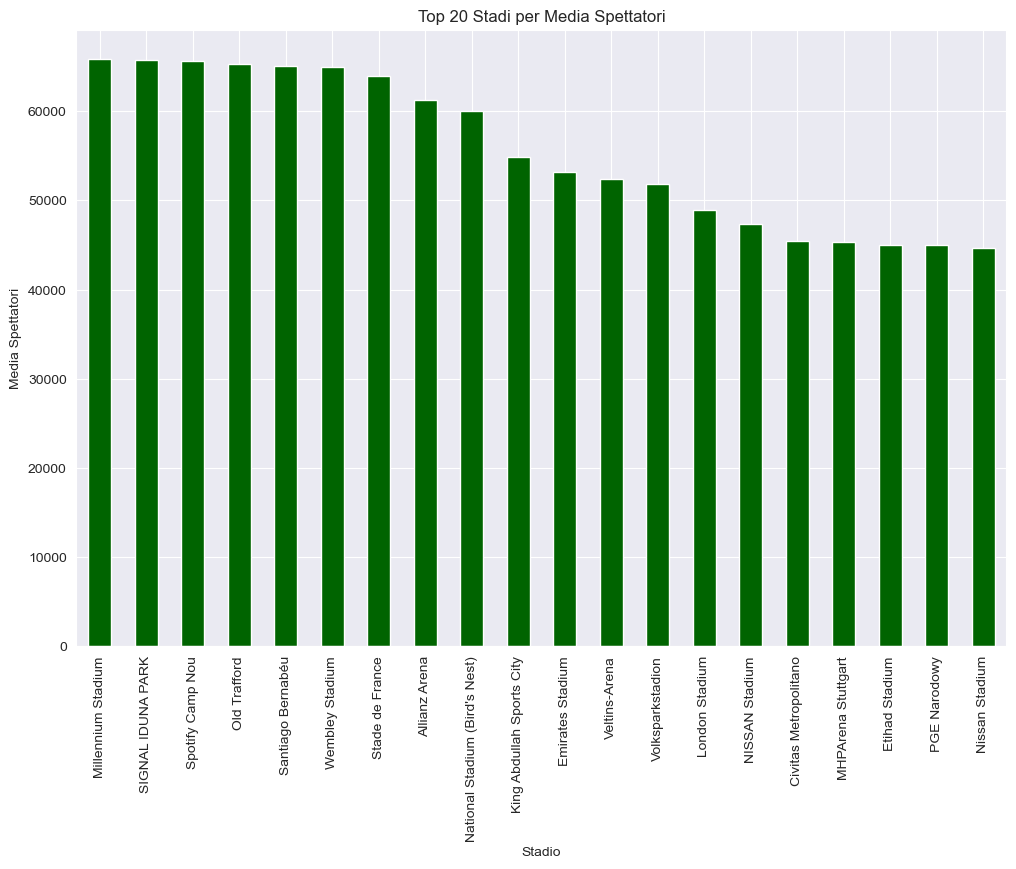

In [11]:
df_filtered = df[df['stadium'].ne('Unknown')]

media_spettatori_stadio = df_filtered.groupby('stadium')['attendance'].mean()

top_20_stadi = media_spettatori_stadio.sort_values(ascending=False).head(20)

top_20_stadi.plot(kind='bar', title='Top 20 Stadi per Media Spettatori', figsize=(12, 8), color='#006400')  

plt.xlabel('Stadio')
plt.ylabel('Media Spettatori')
plt.show()

Proceed with the analysis of the **top 20 referees** who have officiated the most matches.


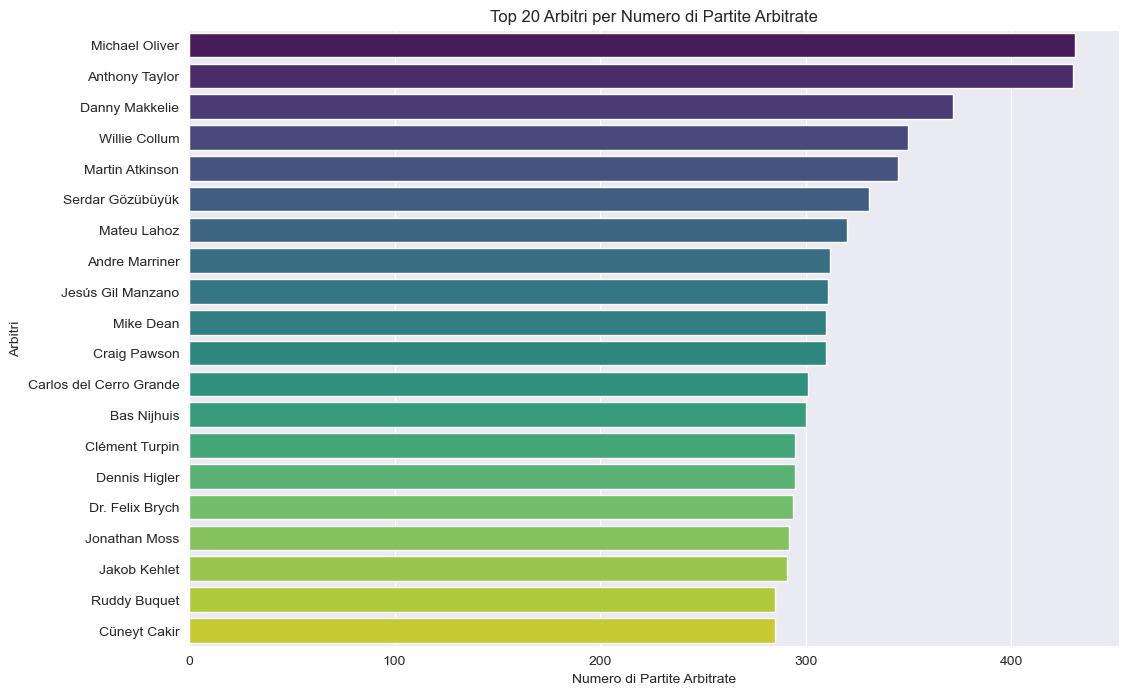

In [12]:
df_filtered = df[df['referee'].ne('Unknown')]

partite_per_referee = df_filtered['referee'].value_counts()

top_20_referee = partite_per_referee.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_20_referee.index, x=top_20_referee.values, palette='viridis', hue=top_20_referee.index)
plt.title('Top 20 Arbitri per Numero di Partite Arbitrate')
plt.xlabel('Numero di Partite Arbitrate')
plt.ylabel('Arbitri')
plt.show()